In [1]:
#Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [2]:
#Read the input file in variable facebook

path = 'C:/Users/Vasu/Desktop/Vasu/LEARNING/data Analytics/UPX/Projects/Project5_Facebook/pseudo_facebook.tsv'
#facebook = pd.read_csv(path,sep='\t',parse_dates=[[3,4,2]])
facebook = pd.read_csv(path,delimiter='\t',parse_dates=[[3,4,2]])
facebook.tail()


#df=pd.read_csv('pseudo_facebook.tsv',delimiter='\t')
#df.head(5)

,dob_year_dob_month_dob_day,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1945-04-04,1268299,68,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1995-03-12,1256153,18,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1998-05-10,1195943,15,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1990-04-11,1468023,23,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1974-05-15,1397896,39,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [3]:
facebook['tenure_mnth']=facebook['tenure']/30
facebook['tenure_mnth']=facebook['tenure_mnth'].round(1)
#df['tenure_yrs']=df['tenure_yrs'].apply(np.ceil)
facebook.head(5)

C:\Users\Vasu\AppData\Local\Enthought\Canopy\User\lib\site-packages\pandas\core\series.py:1342: RuntimeWarning: invalid value encountered in rint
  result = _values_from_object(self).round(decimals)


,dob_year_dob_month_dob_day,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,tenure_mnth
0,1999-11-19,2094382,14,male,266.0,0,0,0,0,0,0,0,0,8.9
1,1999-11-02,1192601,14,female,6.0,0,0,0,0,0,0,0,0,0.2
2,1999-11-16,2083884,14,male,13.0,0,0,0,0,0,0,0,0,0.4
3,1999-12-25,1203168,14,female,93.0,0,0,0,0,0,0,0,0,3.1
4,1999-12-04,1733186,14,male,82.0,0,0,0,0,0,0,0,0,2.7


In [4]:
#facebook variable no of rows and columns
facebook.shape

(99003, 14)

In [5]:
#facebook variable column variables and data types
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 14 columns):
dob_year_dob_month_dob_day    99003 non-null datetime64[ns]
userid                        99003 non-null int64
age                           99003 non-null int64
gender                        98828 non-null object
tenure                        99001 non-null float64
friend_count                  99003 non-null int64
friendships_initiated         99003 non-null int64
likes                         99003 non-null int64
likes_received                99003 non-null int64
mobile_likes                  99003 non-null int64
mobile_likes_received         99003 non-null int64
www_likes                     99003 non-null int64
www_likes_received            99003 non-null int64
tenure_mnth                   99001 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(10), object(1)
memory usage: 10.6+ MB


In [6]:
#Renaming the date of birth coumn to shorter name as DOB and further setting index of te dataframe as userid

facebook.rename(columns = {'dob_year_dob_month_dob_day':'DOB'},inplace=True)
facebook = facebook.set_index('userid')
facebook.head()

,DOB,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,tenure_mnth
userid,,,,,,,,,,,,,
2094382,1999-11-19,14,male,266.0,0,0,0,0,0,0,0,0,8.9
1192601,1999-11-02,14,female,6.0,0,0,0,0,0,0,0,0,0.2
2083884,1999-11-16,14,male,13.0,0,0,0,0,0,0,0,0,0.4
1203168,1999-12-25,14,female,93.0,0,0,0,0,0,0,0,0,3.1
1733186,1999-12-04,14,male,82.0,0,0,0,0,0,0,0,0,2.7


In [8]:
#Likes received by tenure_mnth
likes_fb1=facebook.groupby(['tenure_mnth'])[['likes_received']].mean()
likes_fb1

,likes_received
tenure_mnth,
0.0,4.884615
0.1,49.421941
0.2,12.702602
0.3,32.865772
0.4,31.334320
0.5,44.712209
0.6,43.000000
0.7,76.719895
0.8,37.992000


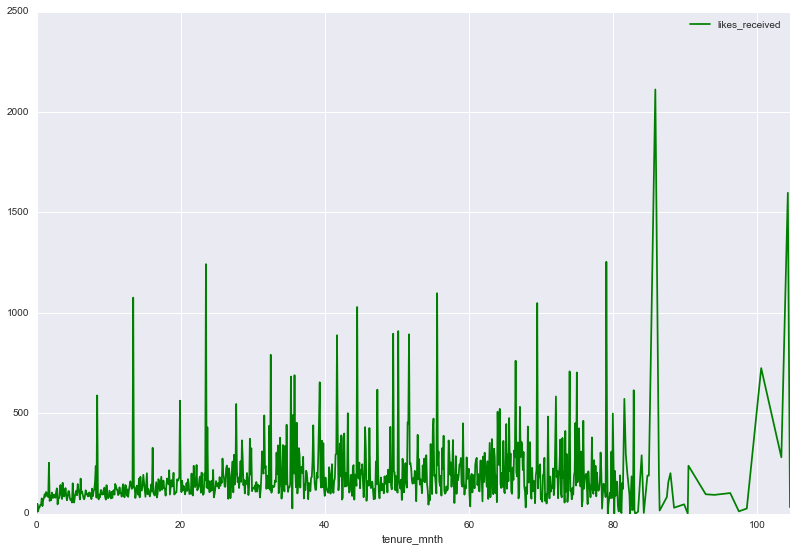

In [9]:
# plot likes_received by tenure_mnth
plt1 = likes_fb1.plot(likes_fb1.index,'likes_received', kind='line', color='g')

# changes the size of the graph
fig = plt1.get_figure()
fig.set_size_inches(13.5, 9)
#plt1.figure(figsize=(20,10))

In [11]:
# likes_received by tenure_mnth for female
gender_f=facebook[facebook['gender']=='female']
f_likes_fb1=gender_f.groupby(['tenure_mnth'])[['likes_received']].mean()
f_likes_fb1

,likes_received
tenure_mnth,
0.0,8.250000
0.1,131.650794
0.2,14.030303
0.3,75.352941
0.4,52.098039
0.5,124.141414
0.6,71.948276
0.7,192.478992
0.8,93.269565


# SLIDE 18 - Business Question - How does likes received relate to  users as they continue to stay long tenure on Facebook?

Line Graph for Likes Received v/s Tenure (in months) among the Facebook users for Females & Males.

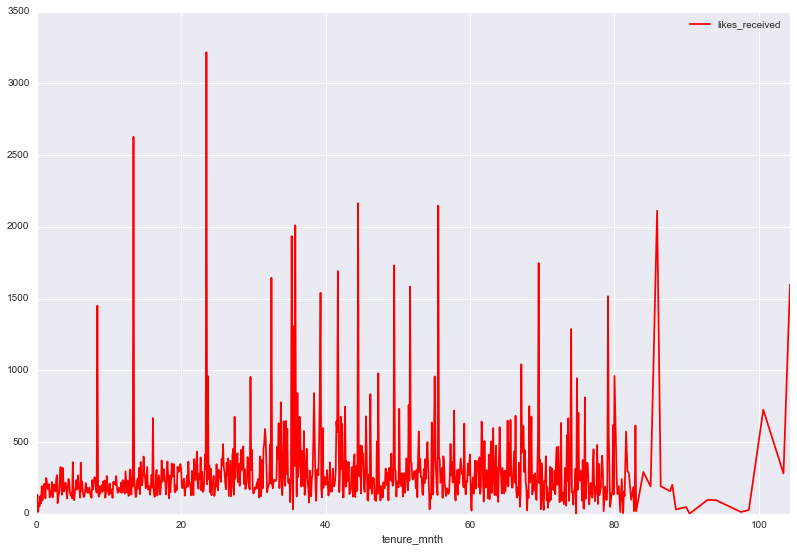

In [12]:
# plot likes_received by tenure_mnth for female
plt_f = f_likes_fb1.plot(f_likes_fb1.index,'likes_received', kind='line', color='r')
# changes the size of the graph
fig = plt_f.get_figure()
fig.set_size_inches(13.5, 9)

In [13]:
# likes_received by tenure_mnth for male
gender_m=facebook[facebook['gender']=='male']
m_likes_fb1=gender_m.groupby(['tenure_mnth'])[['likes_received']].mean()
m_likes_fb1

,likes_received
tenure_mnth,
0.0,3.388889
0.1,19.649425
0.2,12.270936
0.3,15.910798
0.4,22.360169
0.5,12.616327
0.6,28.771186
0.7,24.342205
0.8,13.542308


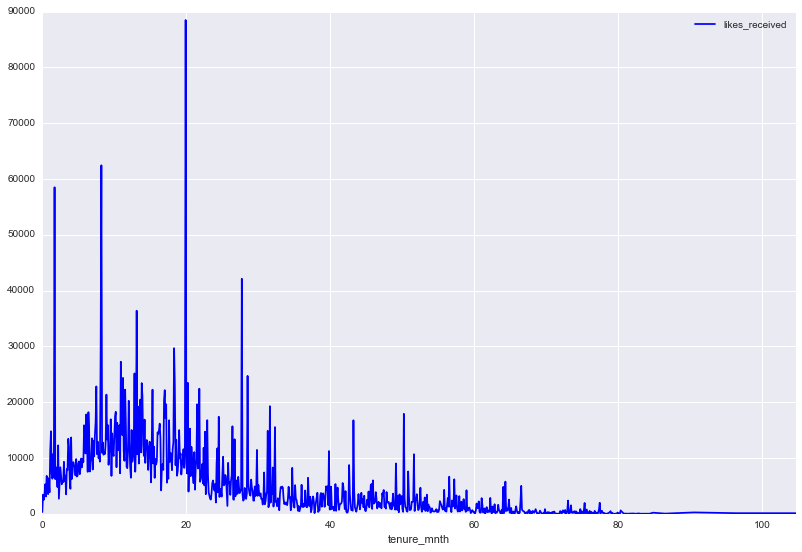

In [38]:
# Plot likes_received by tenure_mnth for male
plt_m = m_likes_fb1.plot(m_likes_fb1.index,'likes_received', kind='line', color='b')
# changes the size of the graph
fig = plt_m.get_figure()
fig.set_size_inches(13.5, 9)

# SLIDE 18 -END OF ANALYSIS FOR 'How does likes received relate to users as they continue to stay long tenure on Facebook?'

The below analysis is not part of the PPT Presentation but one can see the same for some more info.


In [39]:
likes_fb1.describe()


,likes_received
count,847.000000
mean,16678.389610
std,23158.115362
min,0.000000
25%,3106.000000
50%,8635.000000
75%,25667.500000
max,405581.000000


In [40]:
f_likes_fb1.describe()


,likes_received
count,829.000000
mean,12208.930036
std,19818.926293
min,0.000000
25%,2278.000000
50%,6405.000000
75%,18103.000000
max,396581.000000


In [41]:
m_likes_fb1.describe()

,likes_received
count,815.000000
mean,4880.798773
std,6965.903742
min,0.000000
25%,539.500000
50%,2369.000000
75%,7066.500000
max,88481.000000


In [ ]:

likes_fb=facebook[['tenure_yrs','likes_received']]
likes_fb=likes_fb.groupby('tenure_yrs').mean().unstack().reset_index()
likes_fb['avglikesyr']=likes_fb[0]/likes_fb['tenure_yrs']
likes_fb

In [ ]:

likes_fb=likes_fb[['tenure_yrs','avglikesyr']]
likes_fb

In [ ]:

%matplotlib inline
likes_fb['avglikesyr'].plot()

In [ ]:

female_likes_fb=facebook[facebook['gender']=='female']
female_likes_fb=female_likes_fb[['tenure_yrs','likes_received']]
female_likes_fb=female_likes_fb.groupby('tenure_yrs').mean().unstack().reset_index()
female_likes_fb['avglikesyr']=female_likes_fb[0]/female_likes_fb['tenure_yrs']
female_likes_fb=female_likes_fb[['tenure_yrs','avglikesyr']]
female_likes_fb

In [ ]:

female_likes_fb['avglikesyr'].plot()

In [ ]:

male_likes_fb=facebook[facebook['gender']=='male']
male_likes_fb=male_likes_fb[['tenure_yrs','likes_received']]
male_likes_fb=male_likes_fb.groupby('tenure_yrs').mean().unstack().reset_index()
male_likes_fb['avglikesyr']=male_likes_fb[0]/male_likes_fb['tenure_yrs']
male_likes_fb=male_likes_fb[['tenure_yrs','avglikesyr']]
male_likes_fb

In [ ]:

male_likes_fb['avglikesyr'].plot()

In [ ]:

gender_likes=pd.merge(female_likes_fb, male_likes_fb, on='tenure_yrs')
gender_likes.columns=['tenure_yrs','female','male']
gender_likes[['female','male']].plot()

In [ ]:

likes_Vs_age=plt.scatter(facebook['likes'],facebook['age'])
print('The mode of age   for facebook users is :',(facebook['age']).mode())
print('The mean of age  for the facebbok users is',(facebook['age']).mean())
print('The max of age for the facebook users is ', (facebook['age']).max())
print('The minimum age fro the facebook user is ', (facebook['age']).min())
                         

Conclusion: 
Most users will receive the most likes in their first year of joining facebook and over the years the number of likes they receive will drop. This will bottom on the 8 years, and they will start to see a steady raise in the likes they received thereafter.

The contribution of Males likes received seem to be insignificant in this case. As can be seen that the shape of the two charts seem to be more similiar with female likes received.

The conculsion is more suitable make towards female facebook user. As can be seen from the last graph, male user has seen a steady decline in likes received over the years. And no bottom in sight.

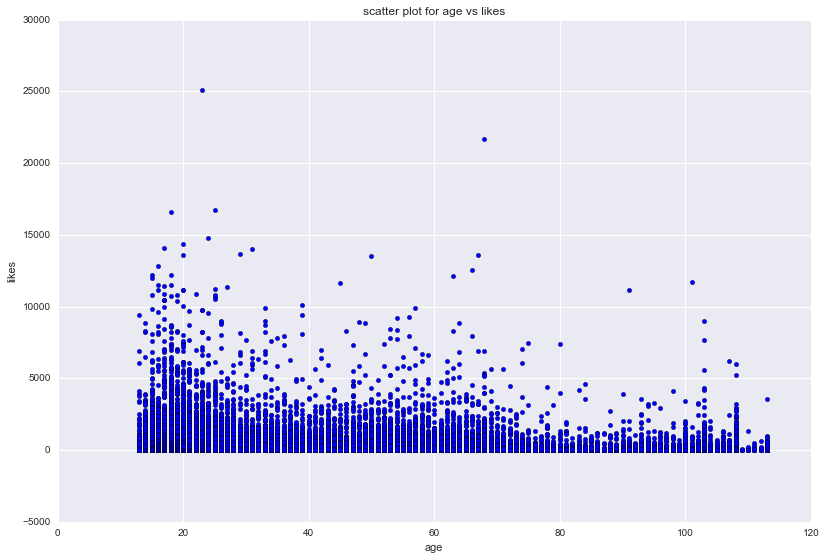

In [42]:

likes_Vs_age=plt.scatter(facebook['age'],facebook['likes'])

# changes the size of the graph
fig = likes_Vs_age.get_figure()
fig.set_size_inches(13.5, 9)

plt.xlabel('age')
plt.ylabel('likes')
plt.title('scatter plot for age vs likes')

In [43]:
# replaced outliers with mean to visualize the relationship between age and likes

#df=pd.DataFrame({'a':[facebook['age']],'b':[facebook['likes']]})
#print(df)

def replace(data):
    mean, std = data.mean(), data.std()
    outliers = (data - mean).abs() > 3*std
    data[outliers] = mean        # or "group[~outliers].mean()"
    return data

filtered_L_d = replace(facebook['likes'])
print filtered_L_d

#df.groupby('a').transform(replace)

userid
2094382      0.000000
1192601      0.000000
2083884      0.000000
1203168      0.000000
1733186      0.000000
1524765      0.000000
1136133      0.000000
1680361      0.000000
1365174      0.000000
1712567      0.000000
1612453      0.000000
2104073      0.000000
1918584      0.000000
1704433      0.000000
1932519      0.000000
1751722      0.000000
1470850      0.000000
1001768      0.000000
1537661      0.000000
1020296      0.000000
1472643      0.000000
2041297      0.000000
1514978      0.000000
1708962      0.000000
1098955      0.000000
1001243      0.000000
2113084      0.000000
2163454      0.000000
1670750      0.000000
1041376      0.000000
              ...    
1836366    156.078785
1686646    156.078785
1749991    156.078785
1963699    156.078785
1390362    156.078785
1638976    156.078785
1991657    156.078785
1184126    156.078785
1277820    156.078785
1364616    156.078785
1757787    156.078785
1674381    156.078785
1299870    156.078785
1043082    156.078785
136

C:\Users\DELL\AppData\Local\Enthought\Canopy32\User\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


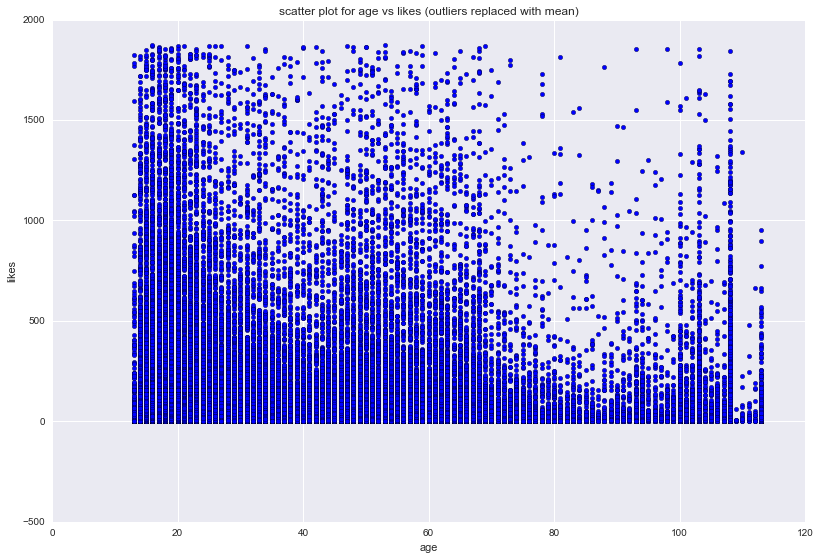

In [44]:
# plot with outliers smoothed
likes_Vs_age_outliersrm=plt.scatter(facebook['age'],filtered_L_d)

# changes the size of the graph
fig = likes_Vs_age_outliersrm.get_figure()
fig.set_size_inches(13.5, 9)

plt.xlabel('age')
plt.ylabel('likes')
plt.title('scatter plot for age vs likes (outliers replaced with mean)')

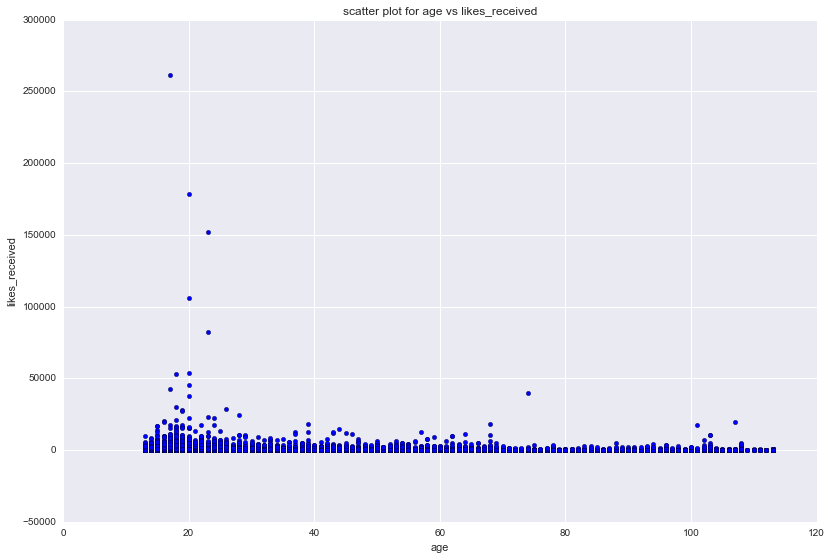

In [45]:
likes_received_Vs_age=plt.scatter(facebook['age'],facebook['likes_received'])

# changes the size of the graph
fig = likes_received_Vs_age.get_figure()
fig.set_size_inches(13.5, 9)

plt.xlabel('age')
plt.ylabel('likes_received')
plt.title('scatter plot for age vs likes_received')

In [46]:
# replaced outliers with mean to visualize the relationship between age and likes_received

#df=pd.DataFrame({'a':[facebook['age']],'b':[facebook['likes']]})
#print(df)

def replace(data):
    mean, std = data.mean(), data.std()
    outliers = (data - mean).abs() > 3*std
    data[outliers] = mean        # or "group[~outliers].mean()"
    return data

filtered_LR_d = replace(facebook['likes_received'])
print filtered_LR_d

#df.groupby('a').transform(replace)

userid
2094382       0.000000
1192601       0.000000
2083884       0.000000
1203168       0.000000
1733186       0.000000
1524765       0.000000
1136133       0.000000
1680361       0.000000
1365174       0.000000
1712567       0.000000
1612453       0.000000
2104073       0.000000
1918584       0.000000
1704433       0.000000
1932519       0.000000
1751722       0.000000
1470850       0.000000
1001768       0.000000
1537661       0.000000
1020296       0.000000
1472643       0.000000
2041297       0.000000
1514978       0.000000
1708962       0.000000
1098955       0.000000
1001243       0.000000
2113084       0.000000
2163454       0.000000
1670750       0.000000
1041376       0.000000
              ...     
1836366     142.689363
1686646     142.689363
1749991     142.689363
1963699     584.000000
1390362    2475.000000
1638976    3256.000000
1991657     142.689363
1184126     142.689363
1277820     142.689363
1364616    3058.000000
1757787     142.689363
1674381     142.689363
1299

C:\Users\DELL\AppData\Local\Enthought\Canopy32\User\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


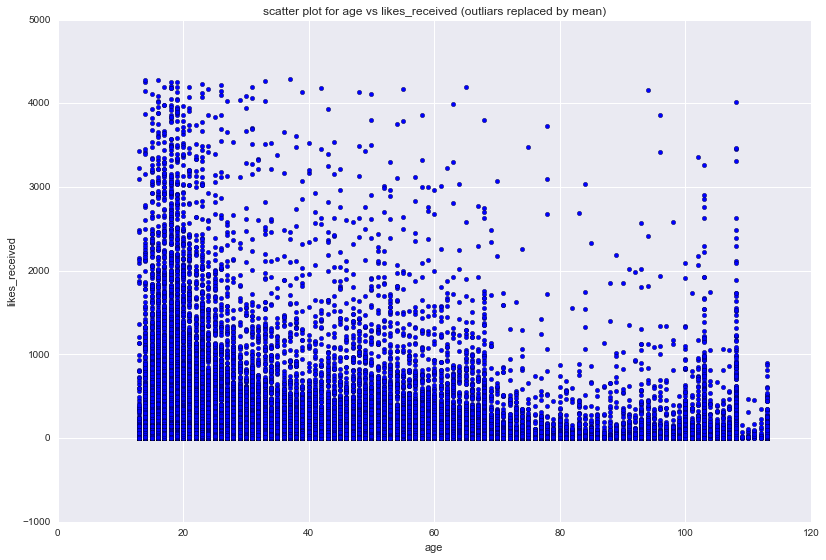

In [47]:
likes_received_Vs_age_outliersrm=plt.scatter(facebook['age'],filtered_LR_d)

# changes the size of the graph
fig = likes_received_Vs_age_outliersrm.get_figure()

fig.set_size_inches(13.5, 9)

plt.xlabel('age')
plt.ylabel('likes_received')
plt.title('scatter plot for age vs likes_received (outliars replaced by mean)')


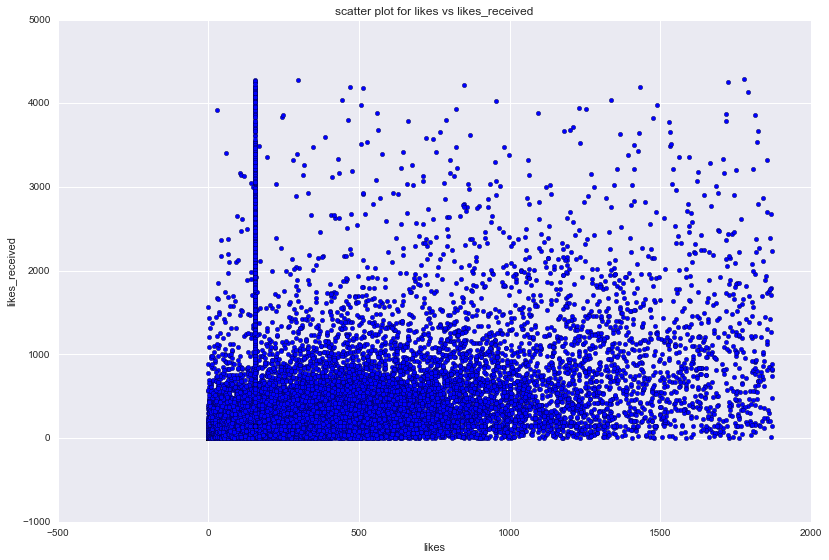

In [48]:
likes_received_Vs_likes=plt.scatter(facebook['likes'],facebook['likes_received'])

# changes the size of the graph
fig = likes_received_Vs_likes.get_figure()
fig.set_size_inches(13.5, 9)

plt.xlabel('likes')
plt.ylabel('likes_received')
plt.title('scatter plot for likes vs likes_received')

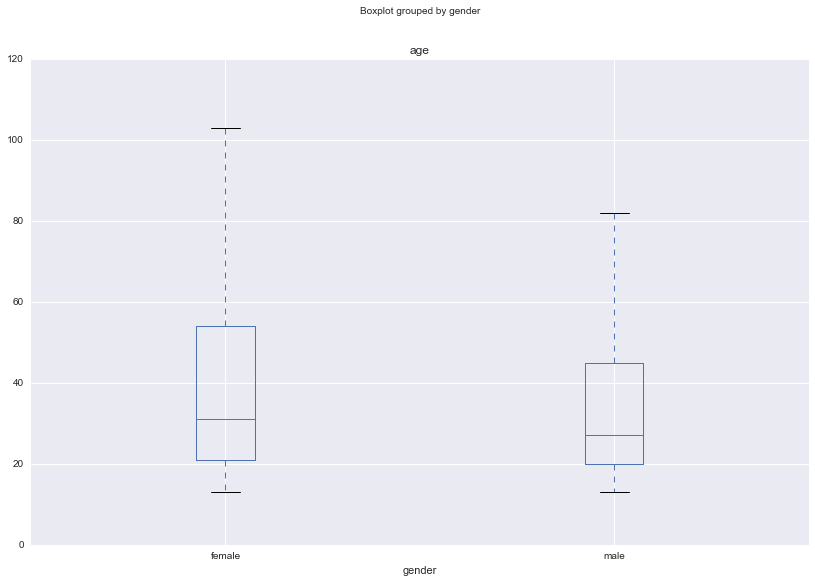

In [123]:

bp_age_gender = facebook.boxplot(column='age', by='gender')

# changes the size of the graph
fig = bp_age_gender.get_figure()

fig.set_size_inches(13.5, 9)

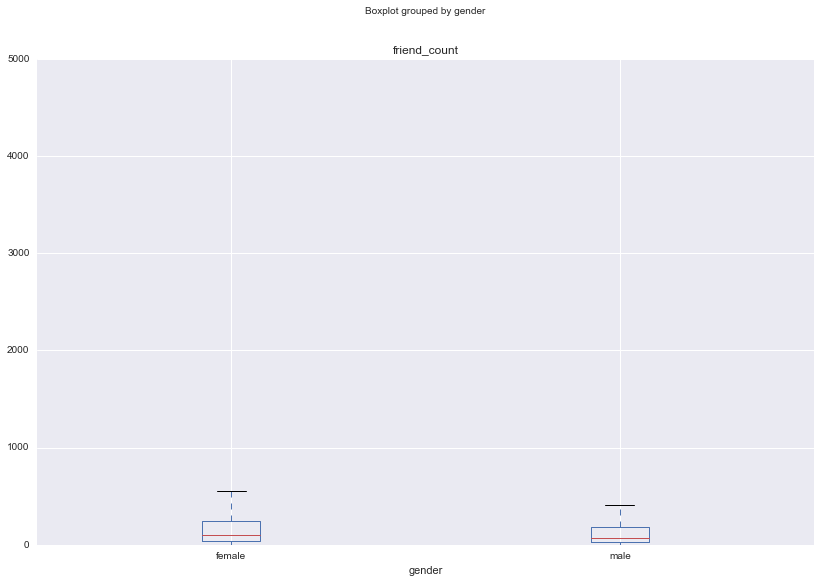

In [124]:

bp_fc_gender = facebook.boxplot(column='friend_count', by='gender')
# changes the size of the graph
fig = bp_fc_gender.get_figure()

fig.set_size_inches(13.5, 9)


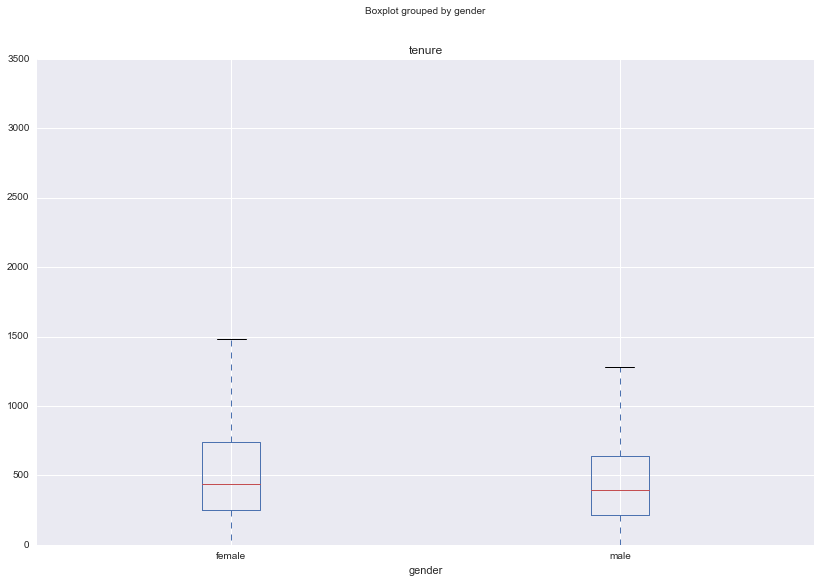

In [125]:

bp_tenure_gender = facebook.boxplot(column='tenure', by='gender')
# changes the size of the graph
fig = bp_tenure_gender.get_figure()

fig.set_size_inches(13.5, 9)


In [129]:
m = (facebook['gender']=='male').sum()
m


58574

In [128]:
f = (facebook['gender']=='female').sum()
f

40254

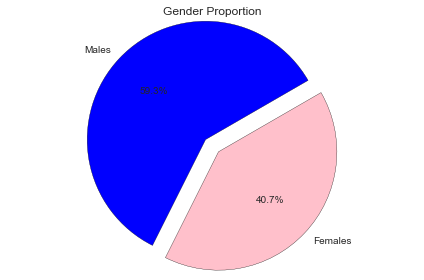

In [130]:
# Deigo
#Lets draw Pie chart for population proportion of males and females

percent_pop = [m,f]

plt.pie(
      percent_pop,
      labels = ['Males','Females'],
      shadow = False,
       colors = ['blue','pink'],
       explode = (0.15 , 0),
       startangle =30,
       autopct = '%1.1f%%'
)
plt.axis('equal')
plt.title("Gender Proportion")
plt.tight_layout()
plt.show()

In [131]:

#Lets find out the No. of like received by Females

likes = facebook.groupby('gender')[['likes_received']].sum()
flikes = likes.ix['female']

#And No. of like received by Males
mlikes = likes.ix['male']
print(mlikes)
print(flikes)

likes_received    3.196099e+06
Name: male, dtype: float64
likes_received    7.274924e+06
Name: female, dtype: float64


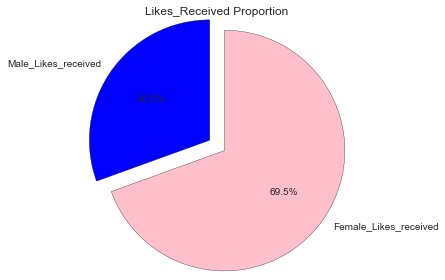

In [132]:
#As we saw the population proportion of males vs feamles, lets see the proportion of facebook likes for males vs females

percent_likes = [mlikes,flikes]

plt.pie(
      percent_likes,
      labels = ['Male_Likes_received','Female_Likes_received'],
      shadow = False,
       colors = ['blue','pink'],
       explode = (0.15 , 0),
       startangle = 90,
       autopct = '%1.1f%%'
)
plt.axis('equal')
plt.title("Likes_Received Proportion")
plt.tight_layout()
plt.show()

#Analysis :- So, we saw in spite of having the more percentage population proportion of males , the likes proportion of females is
#much higher than males..:) 

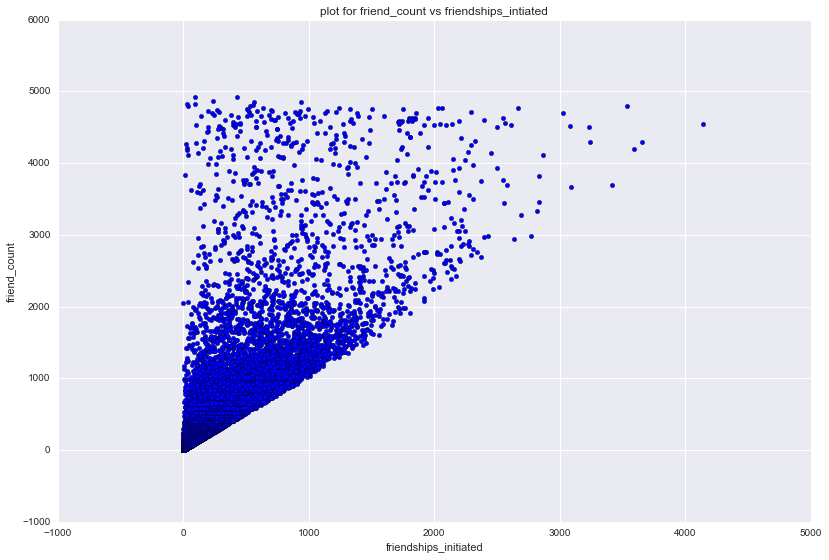

In [49]:

#Lets plot to see how the plot is for friend_count & friendship_initiated for users.

fr_initiated_vs_fr = plt.scatter(facebook['friendships_initiated'],facebook['friend_count'])

# changes the size of the graph
fig = fr_initiated_vs_fr.get_figure()
fig.set_size_inches(13.5, 9)

plt.xlabel('friendships_initiated')
plt.ylabel('friend_count')
plt.title('plot for friend_count vs friendships_intiated')

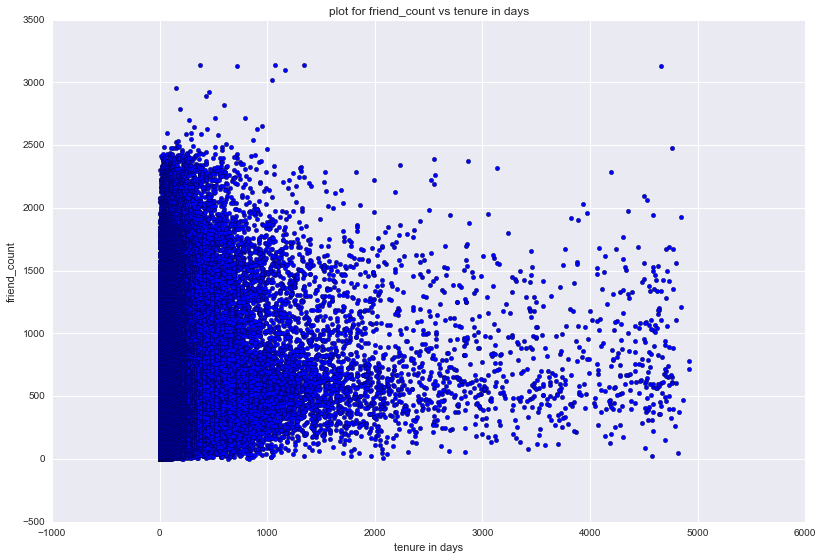

In [50]:

#Lets see one last to check how fiend_count vary w.r.t tenure of a user

fr_cnt_vs_tenure_days = plt.scatter(facebook['friend_count'],facebook['tenure'])
plt.xlabel('tenure in days')
plt.ylabel('friend_count')
plt.title('plot for friend_count vs tenure in days')

# changes the size of the graph
fig = fr_cnt_vs_tenure_days.get_figure()
fig.set_size_inches(13.5, 9)

#Analysis :- This plot again seems to me a blurred example of right skewed distribution, it seems till the tenure of 1000
#days, friend_count is increasing & is at peaks.And for all the user whose tenure is incresing there is surge in friends count...

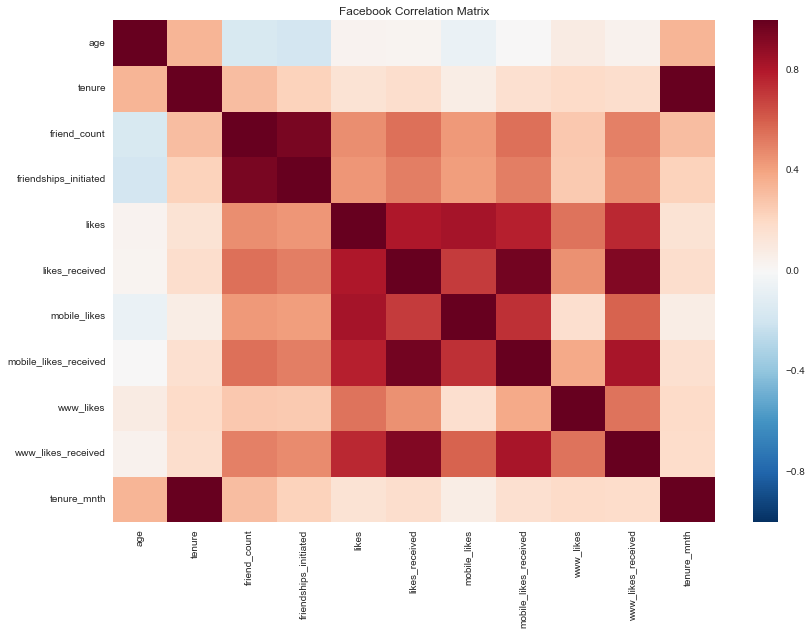

In [52]:

# Lets draw the correlation matrix to see the correlation impact of each attribute with each other.

corr=facebook.corr(method='spearman')
%matplotlib inline
plt.title('Facebook Correlation Matrix')
corr_hm = sns.heatmap(corr)

# changes the size of the graph
fig = corr_hm.get_figure()
fig.set_size_inches(13.5, 9)


#Analysis :- So, from the below we can make out that there is a positive co=relation between Friend_count & friend_ships
# initiated & similary we have positive correlation for various likes received/given with total number of likes.
# Another interesting aspect is friend_count/friendships_initiated is in near to negative correlation with age, this
# is what we have also seen in the above plots as well...(Like wise we csn do other investigations as well)

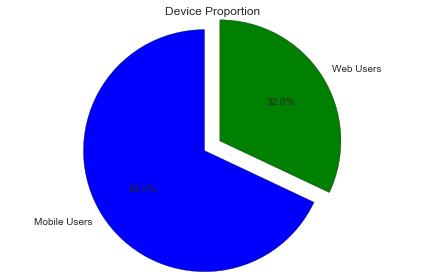

In [59]:
#Determine how many people are using Mobile over Web for accessing facebook

mobile_usage = (facebook['mobile_likes']).sum()
web_usage = (facebook['www_likes']).sum()
mobile_usage
web_usage

percent_pop = [mobile_usage,web_usage]

plt.pie(
      percent_pop,
      labels = ['Mobile Users','Web Users'],
      shadow = False,
       #colors = ['blue','pink'],
       explode = (0.15 , 0),
       startangle = 90,
       autopct = '%1.1f%%'
)
plt.axis('equal')
plt.title("Device Proportion")
plt.tight_layout()
plt.show()


In [ ]:
# Plot likes_received by tenure_mnth for female
plt_m = m_likes_fb1.plot(m_likes_fb1.index,'likes_received', kind='line', color='b')
# changes the size of the graph
fig = plt_m.get_figure()
fig.set_size_inches(13.5, 9)

In [58]:

# Data Transformation is required as there will be numerous age values and need to put in respective group to help 
# analyze Age related factors better

def age_compute(row):
    if row['age'] < 20:
        return '13-19'
    elif row['age'] >= 20 and row['age'] < 30:
        return '20-29'
    elif row['age'] >= 30 and row['age'] < 40:
        return '30-39'
    elif row['age'] >= 40 and row['age'] < 50:
        return '40-49'
    elif row['age'] >= 50 and row['age'] < 60:
        return '50-59'
    elif row['age'] >= 60:
        return '60 Plus'

facebook['age_group'] = facebook.apply(age_compute,axis=1)

facebook.tail()

,DOB,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,tenure_mnth,age_group
userid,,,,,,,,,,,,,,
1268299,1945-04-04,68,female,541.0,2118,341,156.078785,142.689363,3505,11887,491,6202,18.0,60 Plus
1256153,1995-03-12,18,female,21.0,1968,1720,156.078785,142.689363,4399,10592,2,2820,0.7,13-19
1195943,1998-05-10,15,female,111.0,2002,1524,156.078785,142.689363,11959,11462,0,1092,3.7,13-19
1468023,1990-04-11,23,female,416.0,2560,185,156.078785,142.689363,4506,5760,0,756,13.9,20-29
1397896,1974-05-15,39,female,397.0,2049,768,156.078785,142.689363,9410,9530,0,2913,13.2,30-39


In [71]:
likes_fb1_agegrp=facebook.groupby(['age_group'])[['mobile_likes','www_likes']].sum()
likes_fb1_agegrp

,mobile_likes,www_likes
age_group,,
13-19,2988598,1487799
20-29,3059797,1047682
30-39,1246126,337848
40-49,926701,351129
50-59,979104,663199
60 Plus,1305506,1058773


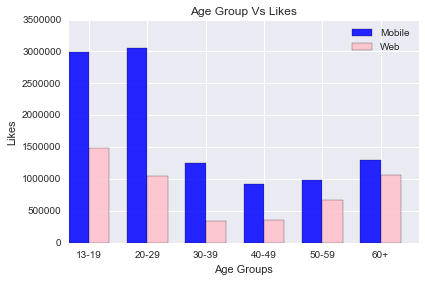

In [72]:
#Lets plot bar graph for 'Age Group Vs Likes'

n_groups = 6
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = .85
 
rects1 = plt.bar(index, likes_fb1_agegrp['mobile_likes'], bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Mobile')
 
rects2 = plt.bar(index + bar_width, likes_fb1_agegrp['www_likes'], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Web')
 
plt.xlabel('Age Groups')
plt.ylabel('Likes')
plt.title('Age Group Vs Likes')
mob_vs_web_by_agegrp = plt.xticks(index + bar_width, ('13-19', '20-29', '30-39', '40-49', '50-59', '60+'))
plt.legend()
 
plt.tight_layout()
plt.show()

# changes the size of the graph
#fig = mob_vs_web_by_agegrp.get_figure()
#fig.set_size_inches(13.5, 9)

In [69]:

gender_f=facebook[facebook['gender']=='female']
f_likes_fb1_agegrp=gender_f.groupby(['age_group'])[['mobile_likes','www_likes']].sum()
f_likes_fb1_agegrp


,mobile_likes,www_likes
age_group,,
13-19,2096448,1085177
20-29,1854720,686730
30-39,849817,249257
40-49,661362,274909
50-59,704145,520159
60 Plus,793945,691433


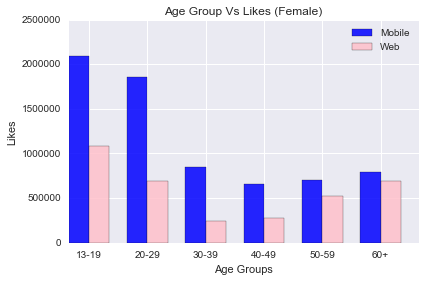

In [74]:
#Lets plot bar graph for 'Age Group Vs Likes (Female)'

n_groups = 6
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = .85
 
rects1 = plt.bar(index, f_likes_fb1_agegrp['mobile_likes'], bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Mobile')
 
rects2 = plt.bar(index + bar_width, f_likes_fb1_agegrp['www_likes'], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Web')
 
plt.xlabel('Age Groups')
plt.ylabel('Likes')
plt.title('Age Group Vs Likes (Female)')
mob_vs_web_by_agegrp = plt.xticks(index + bar_width, ('13-19', '20-29', '30-39', '40-49', '50-59', '60+'))
plt.legend()
 
plt.tight_layout()
plt.show()

# changes the size of the graph
#fig = mob_vs_web_by_agegrp.get_figure()
#fig.set_size_inches(13.5, 9)

In [70]:
gender_m=facebook[facebook['gender']=='male']
m_likes_fb1_agegrp=gender_m.groupby(['age_group'])[['mobile_likes','www_likes']].sum()
m_likes_fb1_agegrp

,mobile_likes,www_likes
age_group,,
13-19,891893,402613
20-29,1204950,360900
30-39,392116,86150
40-49,264659,76216
50-59,271387,141954
60 Plus,504742,362342


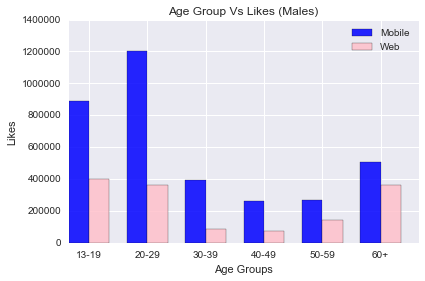

In [73]:
#Lets plot bar graph for 'Age Group Vs Likes (Males)'

n_groups = 6
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = .85
 
rects1 = plt.bar(index, m_likes_fb1_agegrp['mobile_likes'], bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Mobile')
 
rects2 = plt.bar(index + bar_width, m_likes_fb1_agegrp['www_likes'], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Web')
 
plt.xlabel('Age Groups')
plt.ylabel('Likes')
plt.title('Age Group Vs Likes (Males)')
mob_vs_web_by_agegrp = plt.xticks(index + bar_width, ('13-19', '20-29', '30-39', '40-49', '50-59', '60+'))
plt.legend()
 
plt.tight_layout()
plt.show()

# changes the size of the graph
#fig = mob_vs_web_by_agegrp.get_figure()
#fig.set_size_inches(13.5, 9)

In [84]:
likes_fb1_gender=facebook.groupby(['gender'])[['mobile_likes','www_likes']].sum()
likes_fb1_gender

,mobile_likes,www_likes
gender,,
female,6960437,3507665
male,3529747,1430175


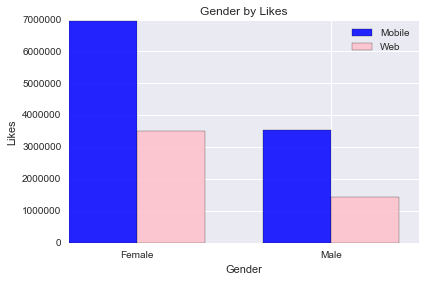

In [85]:
#Lets plot bar graph for 'Age Group Vs Likes'

n_groups = 2
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = .85
 
rects1 = plt.bar(index, likes_fb1_gender['mobile_likes'], bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Mobile')
 
rects2 = plt.bar(index + bar_width, likes_fb1_gender['www_likes'], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Web')
 
plt.xlabel('Gender')
plt.ylabel('Likes')
plt.title('Gender by Likes')
mob_vs_web_by_agegrp = plt.xticks(index + bar_width, ('Female', 'Male'))
plt.legend()
 
plt.tight_layout()
plt.show()

# changes the size of the graph
#fig = mob_vs_web_by_agegrp.get_figure()
#fig.set_size_inches(13.5, 9)

In [75]:
likes_fb1_ten_mnth=facebook.groupby(['tenure_mnth'])[['mobile_likes','www_likes']].sum()
likes_fb1_ten_mnth

,mobile_likes,www_likes
tenure_mnth,,
0.0,300,813
0.1,11684,2823
0.2,4320,1549
0.3,6357,2774
0.4,9012,6005
0.5,12004,5628
0.6,14464,3751
0.7,16620,5538
0.8,15803,7068


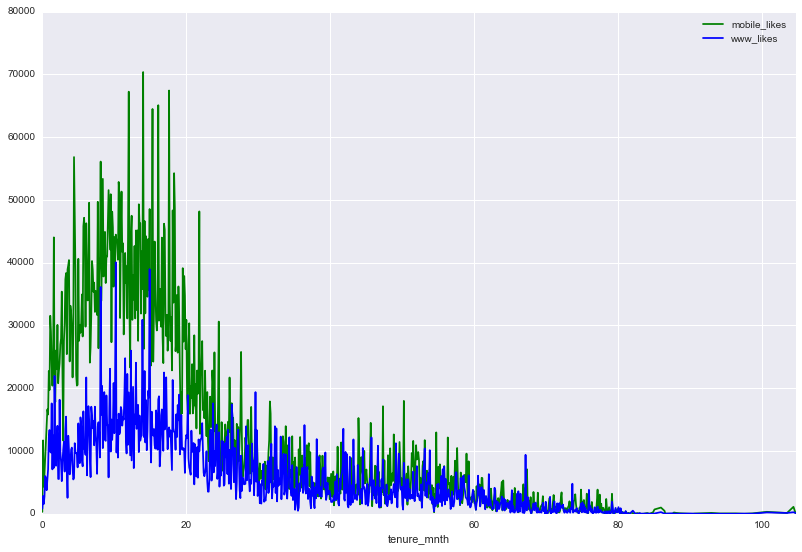

In [82]:
# plot likes_received by tenure_mnth
plt_Tn_mnth_mob_web = likes_fb1_ten_mnth.plot(likes_fb1.index,['mobile_likes','www_likes'], kind='line', color=['g','b'])

# changes the size of the graph
fig = plt_Tn_mnth_mob_web.get_figure()
fig.set_size_inches(13.5, 9)
#plt1.figure(figsize=(20,10))